In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
X = [-1.11, -6.10, 2.42]
Y = [-2.29, -2.91]

N = 50000
beta = 0.95
delta = np.mean(X) - np.mean(Y)


In [3]:

bs_delta = []
for i in range(N):
    bs_X = np.random.choice(X, size=len(X), replace=True)
    bs_y = np.random.choice(Y, size=len(Y), replace=True)
    bs_delta.append(np.mean(bs_X) - np.mean(bs_y) - delta)

bs_delta = sorted(bs_delta)


upper_bound = delta - bs_delta[int(N * (1 - beta)+1)]

print("Доверительный интервал: h < ", upper_bound)


Доверительный интервал: h <  4.153333333333333


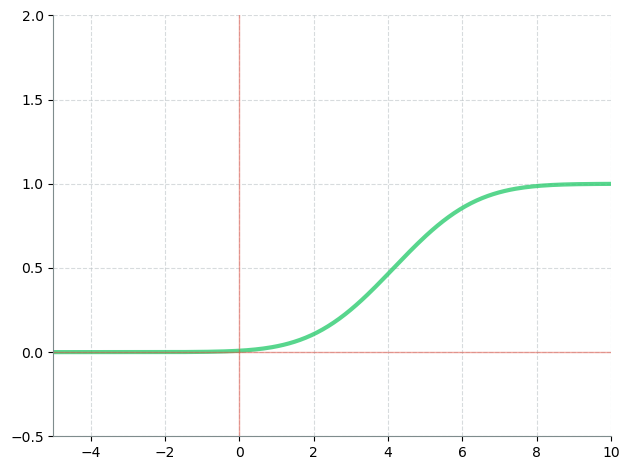

In [6]:
def tet(t):
  return 1 - norm.cdf(upper_bound, loc=t, scale=3**0.5)

tetas = np.linspace(-5, 10, 200)

F_values = [tet(i) for i in tetas]




plt.plot(tetas, F_values, 
         color='#2ecc71', 
         linewidth=3, 
         alpha=0.8,
         markersize=5,
         markeredgecolor='#27ae60',
         markerfacecolor='#ffffff')

plt.grid(True, linestyle='--', alpha=0.6, color='#bdc3c7')
plt.xlim(-5, 10)
plt.ylim(-0.5, 2)

ax = plt.gca()
ax.tick_params(axis='both', which='major', labelsize=10)

plt.axhline(0, color='#e74c3c', linestyle='-', linewidth=1, alpha=0.5)
plt.axvline(0, color='#e74c3c', linestyle='-', linewidth=1, alpha=0.5)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_color('#7f8c8d')
ax.spines['bottom'].set_color('#7f8c8d')

plt.tight_layout()
plt.show()